In [67]:
import chipwhisperer as cw
scope = cw.scope()
target = cw.target(scope)
scope.default_setup()

In [68]:
from tqdm.notebook import trange
import numpy as np

scope.io.tio1 = 'serial_tx'
scope.io.tio2 = 'serial_rx'
scope.trigger.triggers = "nrst"

scope.gain.db = 56
scope.adc.samples = 3000
scope.adc.offset = 0
scope.adc.decimate = 1
scope.clock.clkgen_freq = 4000000 

ktp = cw.ktp.Basic() 
ktp.setInitialKey("54 ee ff 11 21 32 eb 43 bb aa ff 23 98 54 12 12")

In [72]:
#%run "../swaes/real_time_plot.ipynb"
#plot = real_time_plot(plot_len=scope.adc.samples-1)

In [ ]:
import linecache
import time

N = 2000000

for trace_num in trange (a,N,1):
    
    line = linecache.getline(r"fame_coaes_testvectors_5m.txt", trace_num+1)
    p = line[0:32]
    c = line[33:65]
    
    scope.arm()
    target.write('P')
    
    byte_array = bytearray.fromhex(p)
    target.write(byte_array)
    
    ret = scope.capture()
    if ret:
        print("No Trigger")
        break
    
    trace = scope.get_last_trace()
    #plot.send(trace)
    
#################################################################### check ct
    #a = target.read(32,60)
    #h = ''.join([f'{ord(c):x}' for c in a])
    
    #if (h[len(h)-1]=='0'):
            #h = h + '0'

    #for i in range (len(c)):
        #if (h[i]!=c[i]):
            #h = h[:i] + '0' + h[i:]
            
    #print(h)
    #print(c)
       
    #if (h[:32]==c[:32]):
        #np.array(trace).tofile("measured/traces%2d.bin" %(trace_num))
    #else:
        #print(trace_num)
        #break
####################################################################
        
    np.array(trace).tofile("3m_3k/traces%2d.bin" %(trace_num))
    

  0%|          | 0/1734099 [00:00<?, ?it/s]

In [80]:
import glob
import os

folderpath = '3m_3k'
filepath = '3m_3k/traces*.bin'

list_of_files = glob.glob(filepath) 
latest_file = max(list_of_files, key=os.path.getctime)
print('latest file is:',latest_file)

list = os.listdir(folderpath) 
number_files = len(list)
print('total file number is:',number_files)

a = number_files - 1

latest file is: 3m_3k/traces265901.bin
total file number is: 265902


In [21]:
scope.io.tio4 = 'gpio_high'
scope.io.tio4 = 'gpio_low'
scope.io.tio4 = 'high_z'

OSError: [Errno Invalid IO Mode returned by FPGA] 191

# TVLA

In [6]:
fixed_trace = []
fixed_pt = []
random_trace = []
random_pt = []

In [7]:
#for i in trange (N-len(random_trace)):
for i in trange (N):
    scope.arm()
    key, text = ktp.next() 
    target.write(cmd+text)
    ret = scope.capture()
    if ret:
        print("Target timed out!")
        break
    trace_fixed = scope.get_last_trace()
    fixed_trace.append(np.asarray(trace_fixed))
    fixed_pt.append(np.asarray(key))

    scope.arm()
    target.write(cmd+key)
    ret = scope.capture()
    if ret:
        print("Target timed out!")
        break
    trace_random = scope.get_last_trace()
    random_trace.append(np.asarray(trace_random))
    random_pt.append(np.asarray(text))

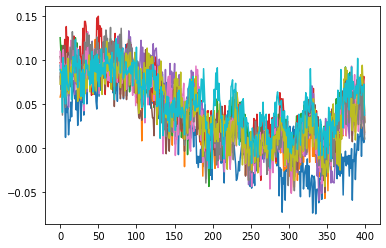

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure()
for i in range (10):
    plt.plot(fixed_trace[i])
plt.show()

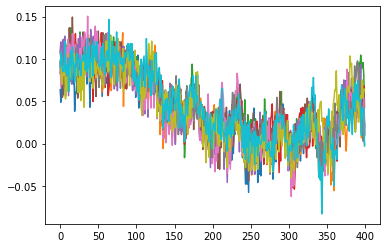

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure()
for i in range (10):
    plt.plot(random_trace[i])
plt.show()